# Pipeline Notebook


Pipeline is collection of functions (machine processing via FaaS, models and code snippets) and tasks (human processing in labeling and QA tasks) that creates a processing flow. Structured from nodes (processing units) and connections (to move data types between nodes).

## 1. Create Pipeline

In [ ]:
import dtlpy as dl
import random
# project_id is automatically set by the notebook 
project_id = 'project_id'
# random pipeline name
pipeline_name = 'my pipeline ' + str(random.randint(1, 1000))

project = dl.projects.get(project_id=project_id)
pipeline = project.pipelines.create(name=pipeline_name)



<style>
    button {
        background-color: #3452ff;
        color: #ffffff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        cursor: pointer;
        font-size: 14px;
        font-weight: 500;
        transition: background-color 0.3s;
    }

    button:hover {
        background-color: #7b8cff;
    }
</style>

<button id="RefreshButtonJupyter">Refresh the page</button>





## 2. Add Dataset Node to the Pipeline

First, create a dataset using the sdk

In [ ]:
dataset_name = 'dataset_name' + str(random.randint(1, 1000))
dataset = project.datasets.create(dataset_name=dataset_name)

Then, add the dataset as a dataset node in the pipeline

In [ ]:
dataset_node = dl.DatasetNode(name=dataset_name,
                              project_id=project.id,
                              dataset_id=dataset.id,
                              position=(1, 1))
pipeline.nodes.add(node=dataset_node)
pipeline.update()

## 3. Add Annotation Task Node to the Pipeline

First, define the Annotation Task parameters

In [ ]:
task_name = 'annotation task' + str(random.randint(1, 1000))
my_user = project.list_members('owner')[0].email
task_owner = my_user
assignee_ids = [my_user]

recipe = dataset.recipes.list()[0]
workload = dl.Workload.generate(assignee_ids=assignee_ids).workload

Then, create the Annotation Task node

In [ ]:
task_node = dl.TaskNode(name=task_name,
                        project_id=project.id,
                        dataset_id=dataset.id,
                        recipe_title=recipe.title,
                        recipe_id=recipe.id,
                        task_owner=task_owner,
                        workload=workload,
                        task_type='annotation',
                        position=(2, 1))
pipeline.nodes.add(node=task_node)
pipeline.update()

## 4. Add QA Task Node to the Pipeline

First, define the QA Task parameters

In [ ]:
task_name = 'qa task' + str(random.randint(1, 1000))
my_user = project.list_members('owner')[0].email
task_owner = my_user
assignee_ids = [my_user]

recipe = dataset.recipes.list()[0]
workload = dl.Workload.generate(assignee_ids=assignee_ids).workload

Then, create the QA Task node

In [ ]:
qa_node = dl.TaskNode(name=task_name,
                        project_id=project.id,
                        dataset_id=dataset.id,
                        recipe_title=recipe.title,
                        recipe_id=recipe.id,
                        task_owner=task_owner,
                        workload=workload,
                        task_type='qa',
                        position=(3, 1))
pipeline.nodes.add(node=qa_node)
pipeline.update()

## 5. Connect the Pipeline Nodes

Then, connect all the nodes togther:

In [ ]:
dataset_node.connect(
    node=task_node,
    source_port=dataset_node.outputs[0],
    target_port=task_node.inputs[0],
)
task_node.connect(
    node=qa_node,
    source_port=task_node.outputs[0],
    target_port=qa_node.inputs[0],
    action='complete'
)
pipeline.update()

## 6. Add Trigger to the Dataset Node

In [ ]:
dataset_node.add_trigger(
    trigger_type=dl.TriggerType.EVENT,
    resource=dl.TriggerResource.ITEM,
    actions=dl.TriggerAction.CREATED,
    execution_mode=dl.TriggerExecutionMode.ONCE
)
pipeline.update()

## 7. Install the Pipeline

In [ ]:

pipeline.install()

## Open the pipeline in edit mode

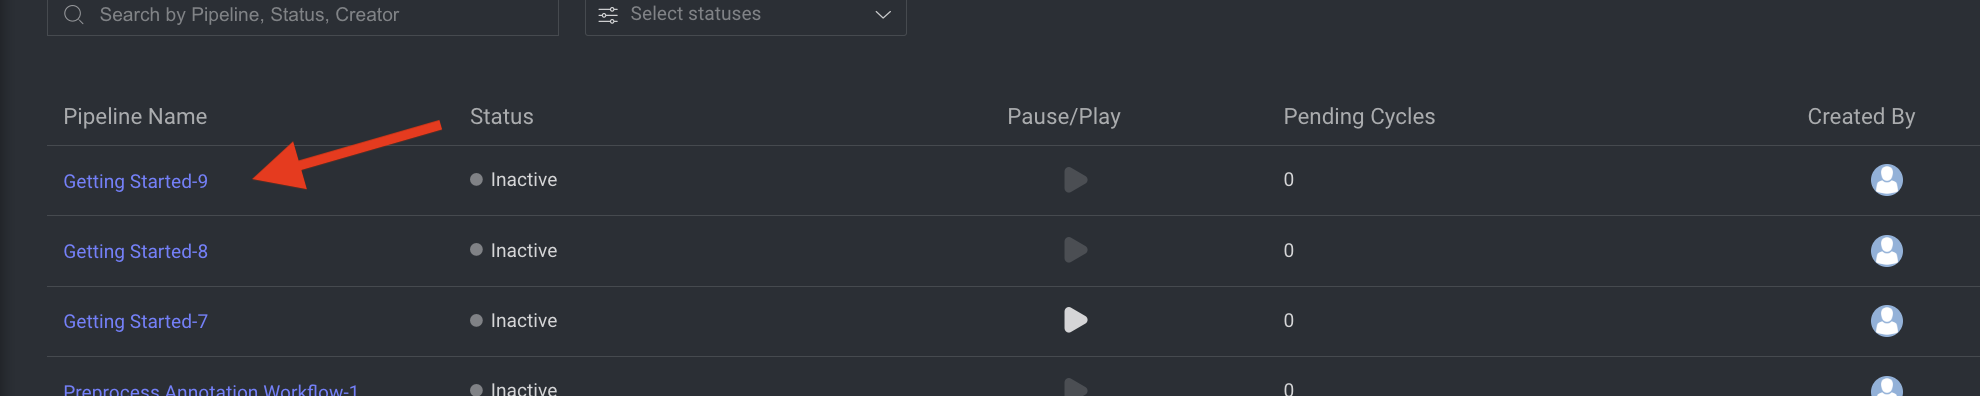

## 8. Trigger the pipeline by uploading an Item

In [ ]:
image_url = "https://raw.githubusercontent.com/dataloop-ai-apps/jupyter-notebook-app/main/notebooks/images/bird/0f67ffd92d.jpg"
dataset.items.upload(local_path=image_url)



<style>
    button {
        background-color: #3452ff;
        color: #ffffff;
        border: none;
        border-radius: 4px;
        padding: 10px 20px;
        cursor: pointer;
        font-size: 14px;
        font-weight: 500;
        transition: background-color 0.3s;
    }

    button:hover {
        background-color: #7b8cff;
    }
</style>

<button id="RefreshButtonJupyter">Refresh the page</button>



